# Parcial 2

In [ ]:
import pandas as pd # Para importar las BD
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos
import pylab
import scipy.stats as stats


### **SERIE 1**

In [ ]:
from datetime import datetime # Módulo para dar formato a las fechas
base1= pd.read_excel("/content/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"]) #par-dates decirle cual variable tiene fecha


In [ ]:
base1.shape #dimensiones, coinciden con la base

(231, 2)

In [ ]:
base1.head()


,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03


In [ ]:
base1.tail()

,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40
230,2021-08-19,22.60


In [ ]:
base1.dtypes

fecha    datetime64[ns]
valor           float64
dtype: object

In [ ]:
base1.sort_values(by="fecha",inplace=True)#ordenar por fecha de manera ascendente

In [ ]:

base1["dia"] = pd.DatetimeIndex(base1["fecha"]).day
base1["dia_sem"] = pd.DatetimeIndex(base1["fecha"]).weekday # 0 es lunes, 1 es martes, ...,  domingo es 6
# Podemos cambiarlo con:

dia_aux1 = base1.dia_sem.unique()
dia_aux2 = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado","Domingo"]

base1.dia_sem.replace(to_replace=dia_aux1, value=dia_aux2, inplace=True)

base1["mes"] = pd.DatetimeIndex(base1["fecha"]).month
base1["anio"] = pd.DatetimeIndex(base1["fecha"]).year
base1.head()

,fecha,valor,dia,dia_sem,mes,anio
0,2021-01-01,0.06,1,Lunes,1,2021
1,2021-01-02,0.05,2,Martes,1,2021
2,2021-01-03,0.05,3,Miércoles,1,2021
3,2021-01-04,0.51,4,Jueves,1,2021
4,2021-01-05,2.03,5,Viernes,1,2021


In [ ]:
base1

,fecha,valor,dia,dia_sem,mes,anio
0,2021-01-01,0.06,1,Lunes,1,2021
1,2021-01-02,0.05,2,Martes,1,2021
2,2021-01-03,0.05,3,Miércoles,1,2021
3,2021-01-04,0.51,4,Jueves,1,2021
4,2021-01-05,2.03,5,Viernes,1,2021
...,...,...,...,...,...,...
226,2021-08-15,16.90,15,Miércoles,8,2021
227,2021-08-16,17.35,16,Jueves,8,2021
228,2021-08-17,18.85,17,Viernes,8,2021
229,2021-08-18,21.40,18,Sábado,8,2021


In [ ]:
base1.set_index("fecha", inplace=True)

Creación de serie de tiempo

In [ ]:
base1_aux = base1[["valor"]].squeeze("columns")
base1_aux

fecha
2021-01-01     0.06
2021-01-02     0.05
2021-01-03     0.05
2021-01-04     0.51
2021-01-05     2.03
              ...  
2021-08-15    16.90
2021-08-16    17.35
2021-08-17    18.85
2021-08-18    21.40
2021-08-19    22.60
Name: valor, Length: 231, dtype: float64

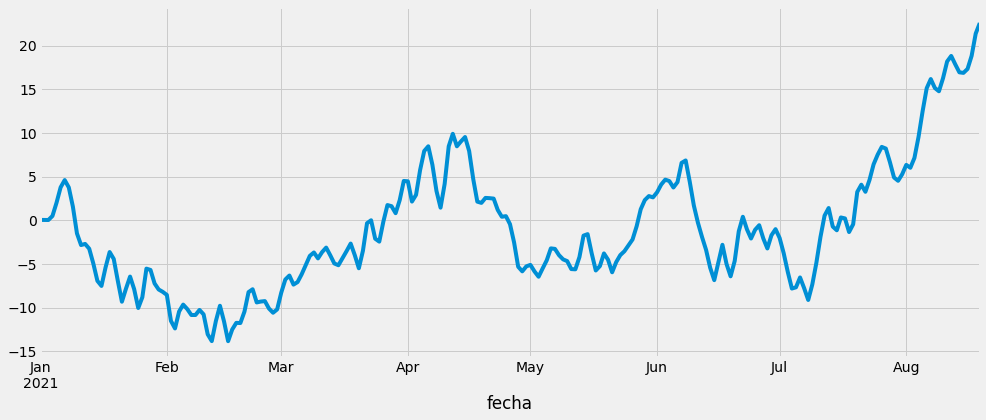

In [ ]:
base1_aux.plot(figsize=(15, 6))
plt.show()

### 1.
Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.


In [ ]:
acf(base1_aux)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.        ,  0.95534841,  0.89390336,  0.84964961,  0.81876524,
        0.78135809,  0.73413899,  0.68778667,  0.6483945 ,  0.61305566,
        0.57519929,  0.53302111,  0.4906605 ,  0.4514964 ,  0.41468256,
        0.37680531,  0.33995065,  0.31033136,  0.28959238,  0.27162518,
        0.25328308,  0.2317714 ,  0.20739882,  0.18081171,  0.1510501 ,
        0.11504691,  0.07184302,  0.02944608, -0.00138318, -0.02535399,
       -0.05427826, -0.08162627, -0.09475017, -0.10231557, -0.11735204,
       -0.1360462 , -0.14736497, -0.15204166, -0.15772561, -0.16337009,
       -0.16452129])

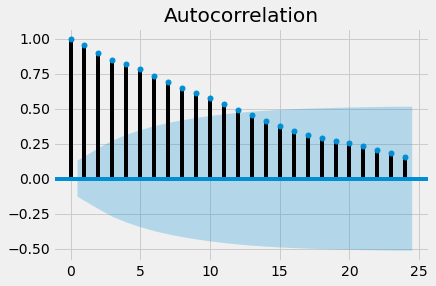

In [ ]:
plot_acf(base1_aux)
plt.show()
#decaimiento exponencial

En la ACF podemos notar un decaimiento exponencial que va lentamente a cero, lo cual nos da una idea de una posible tendencia, es decir que la serie es NO estacionaria y habrá que agregar alguna diferenciación $d$, la anterior idea se probará en los siguientes ítems con la prueba de dickey-fuller.

In [ ]:
pacf(base1_aux, method="ywm")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.00000000e+00,  9.55348412e-01, -2.15179847e-01,  2.09818614e-01,
        4.60892561e-02, -1.04349084e-01, -5.92587331e-02,  1.69554317e-04,
        3.47740833e-03, -1.80037993e-03, -3.32295906e-02, -4.39147919e-02,
       -2.41453307e-02, -1.49714946e-02, -1.54913745e-02, -2.98522310e-02,
        7.12894155e-03,  5.09172783e-02,  5.05731295e-02,  8.61361287e-03,
        1.53987128e-02, -4.51556421e-02, -5.30367639e-02, -5.58041748e-02,
       -6.76880406e-02, -9.65012524e-02, -1.05076481e-01, -2.67042296e-02,
        6.42344241e-02,  3.60354011e-03, -5.18162259e-02,  6.80200088e-02,
        1.17365677e-01, -2.05486278e-02, -4.66686523e-02,  2.73115832e-02,
        4.39530806e-02, -1.72158494e-02, -3.98122716e-02,  2.03821621e-02,
        1.48759926e-02])

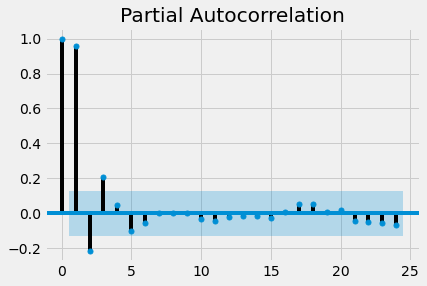

In [ ]:
plot_pacf(base1_aux, method="ywm")
plt.show()

La PACF nos muestra corte en los lags: 1, 2 y 3.

Lo observado en la ACF Y PACF da indicios de un modelo ARIMA, con componente AR(p), con $p \geq 1$,donde se debe aplicar por lo menos una diferenciación, ya que el ACF evidenció tendencia.


### 2.
Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

Al realizar el gráfico de la serie de tiempo original, se observa
que no tiene una media constante (los valores no oscilan horizontalmente
alrededor de un valor fijo), por lo que se procede a realizar la prueba de Dickey- Fuller, para ver si es necesario tomar diferencias.

Las hipótesis por contrastar son:

$$H_0: \gamma=0 \text{ versus  } H_a: \gamma<0$$

Esto también se puede expresar como:

$$H_0 : \text{NO estacionariedad versus   } H_a : \text{ Estacionariedad}$$



In [ ]:
adfuller(base1_aux)

(-0.6940413117038657,
 0.8482869409753933,
 3,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 618.5147960822515)

Como el p-valor=0.8482869409753933 > 0.05=$\alpha$ entonces nos quedamos con la hipótesis nula $H_0:$ Existe una raíz unitaria, no estacionaria. Esto implica que debemos tomar una diferencia:

In [ ]:
base1_aux_dif = base1_aux.diff()

In [ ]:
base1_aux_dif.dropna(inplace=True) # Quitar Na´s

Realizamos nuevamente la prueba de dickey-fuller, para saber si es necesario aplicar una diferencia más.


In [ ]:
adfuller(base1_aux_dif)

(-6.904972776072946,
 1.2540124522200221e-09,
 2,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 612.6121479835192)

Como el p-valor=1.2540124522200221e-09 < 0.05=$\alpha$ entonces nos quedamos con la hipótesis alternativa $H_a:$ No existe una raíz unitaria. Esto implica que no debemos tomar una segunda diferencia, por lo que se incluíra el parámetro d=1 en el modelo ARIMA(p, d, q).

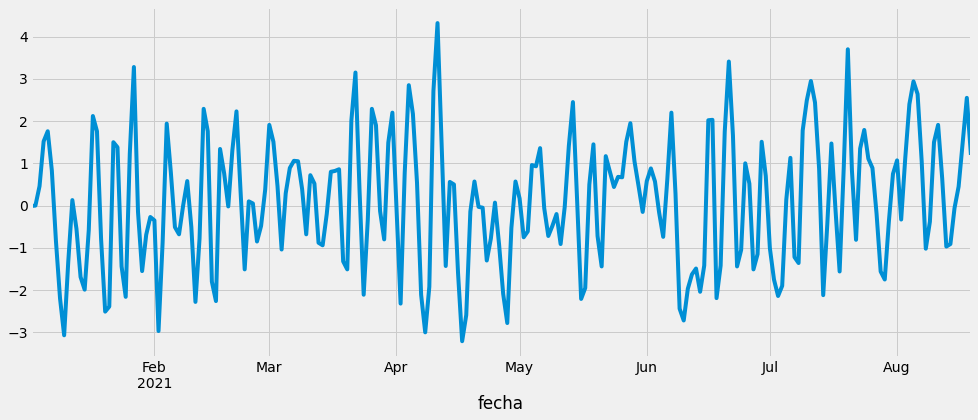

In [ ]:
base1_aux_dif.plot(figsize=(15, 6))
plt.show()

Note que al aplicar diferenciación se elimina la tendencia de la serie. El proceso tiene media constante (los valores oscilan horizontalmente
alrededor del cero)


### 3.
Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [ ]:
acf(base1_aux_dif) #senoidal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.        ,  0.43968926, -0.28746442, -0.24673116,  0.16556725,
        0.2186882 , -0.06544118, -0.20636477, -0.063836  ,  0.14742308,
        0.16717324, -0.01670266, -0.12281927, -0.00765409,  0.14392414,
        0.1065175 , -0.06678125, -0.16089761, -0.07986118,  0.05954611,
        0.10938434,  0.0433413 , -0.03322715,  0.00293518,  0.13687861,
        0.2010733 ,  0.02172076, -0.18980361, -0.09750261,  0.07708872,
       -0.00128627, -0.16460059, -0.08510996,  0.10188974,  0.07319987,
       -0.10874706, -0.17482552, -0.07370875,  0.03546807,  0.00222308,
       -0.08226426])

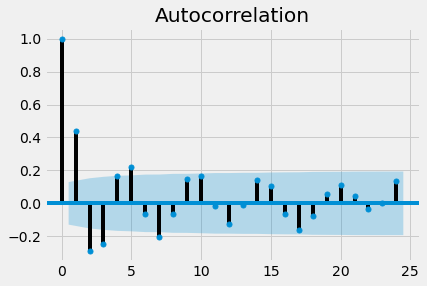

In [ ]:
plot_acf(base1_aux_dif)
plt.show()

Al observar la ACF muestral obtenida luego de aplicar una diferenciación se puede notar un comportamiento senoidal, es decir una cola.


In [ ]:
pacf(base1_aux_dif, method="ywm")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.        ,  0.43968926, -0.59601705,  0.41733136, -0.0906465 ,
        0.0010619 , -0.05479596, -0.02903975, -0.01415557,  0.13924077,
       -0.01700058, -0.03541775,  0.04800176,  0.00878254,  0.05521113,
        0.00172797, -0.04317518, -0.07917729, -0.00313319,  0.00754756,
        0.07760648,  0.0167653 ,  0.00403323,  0.05316832,  0.11319971,
        0.08629925, -0.14113447,  0.02162974,  0.05182976, -0.17904529,
       -0.03213823,  0.01465763,  0.03508485, -0.0425219 , -0.07683898,
       -0.0869207 , -0.04297707, -0.0473162 , -0.02156899, -0.07215762,
        0.05714095])

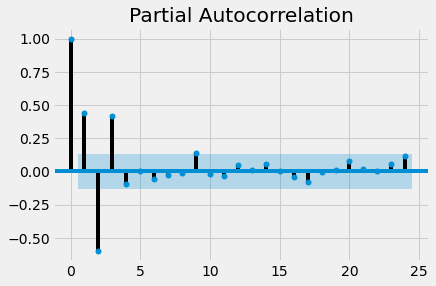

In [ ]:
plot_pacf(base1_aux_dif, method="ywm")
plt.show()   #corte

En la PACF se puede notar corte en los lags: 1,2 y 3.

Teniendo en cuenta lo anterior, pensaremos en un modelo ARIMA(p,d,q), con componentes en p y d, para q sería cero, ya que no se notó la parte MA.

### 4.
Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

### MODELOS PROPUESTOS

$\bullet$ El primer modelo a proponer es un ARIMA(1,1,0), ya que en la PACF
notamos un corte en el lag 1, además se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.



In [ ]:
modelo1_base1 = ARIMA(base1_aux, order=(1,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El segundo modelo propuesto es un ARIMA(2,1,0), ya que en la PACF notamos un corte en el lag 2, además se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.


In [ ]:
modelo2_base1 = ARIMA(base1_aux, order=(2,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El tercer modelo propuesto es un ARIMA(3,1,0), ya que en la PACF notamos un corte en 2, se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.

In [ ]:
modelo3_base1 = ARIMA(base1_aux, order=(3,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Usaremos como criterio de selección para el mejor modelo, el **BIC (Bayesian information criterion)**, ya que penaliza por el tamaño de muestra.


In [ ]:
print(modelo1_base1.bic,modelo2_base1.bic, modelo3_base1.bic)

804.3015324111749 709.9219654434922 671.4753604174917


Obtenemos que el "mejor" modelo es el 3 en comparación con los demás propuestos, con un BIC= 671.4753604174917.

In [ ]:
modelo3_base1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9507,0.059,16.213,0.000,0.836,1.066
ar.L2,-0.8858,0.065,-13.691,0.000,-1.013,-0.759
ar.L3,0.4167,0.060,6.920,0.000,0.299,0.535
sigma2,0.9800,0.103,9.481,0.000,0.777,1.183


El mejor modelo propuesto, está dado por:
$$
\begin{aligned}
& A R I M A(p, d, q) \rightarrow A R IMA(3, 1, 0) \\
& (1-B)^{d} \phi(B) \times x_t=\theta(B) w_{t} \\
& (1-B)\left(1-\phi_{ 1}B-\phi_{2} B^{2}-\phi_{3} B^{3}\right) \times x_t=w_{t} \\
& (1-B)\left(x_{t}-\phi_{1} x_{t-1}-\phi_{2} x_{t-2}-\phi_{3}x_{t-3} \right)=w_{t} \\
& x_{t}-\phi_{1} x_{t-1}-\phi_{2} x_{t-2}-\phi_{3} x_{t-3}-x_{t-1}+\phi_{1} x_{t-2} +\phi_{2} x_{t-3}+\phi_{3} x_{t-4}=w_ t \\
& \hat{x_{t}}=\left(\hat{\phi_{1}}+1\right) x_{t-1}+\left(\hat{\phi_{2}}-\hat{\phi_{1}}\right) x_{t-2} + \left(\hat{\phi_{3}}-\hat{\phi_{2}}\right) x_{t-3}-\hat{\phi_{3}} x_{t-4}
\end{aligned}
$$

Donde $\hat{\phi_{1}}=0.9507,\hat{\phi_{2}}= -0.8858 \text{ y   } \hat{\phi_{3}=0.4167}$

###5.
Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [ ]:
modelo3_base1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9507,0.059,16.213,0.000,0.836,1.066
ar.L2,-0.8858,0.065,-13.691,0.000,-1.013,-0.759
ar.L3,0.4167,0.060,6.920,0.000,0.299,0.535
sigma2,0.9800,0.103,9.481,0.000,0.777,1.183


- El proceso $ARIMA(p,d,q)$ es estacionario si las raíces unitarias (las cuales pueden ser números complejos) de
$$
\phi(B)=1-0.9507B+0.8858 B^2-0.4167B^3=0
$$
están fuera del círculo unitario.



In [ ]:
coeff=[-0.4167,0.8858,-0.9705,1]
abs(np.roots(coeff))

array([1.60599068, 1.22240957, 1.22240957])

Como las raíces del polinomio $\phi(B)$ están por fuera del círculo unitario, podemos decir que el proceso ARIMA(3,1,0) es estacionario e invertible.

### 6.
Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


Las hipótesis a aprobar serán:

$$H0 : \rho_1(w) = \rho_2(w) = · · · = \rho_{10}(w) = 0 $$
$$Vs$$
$$Ha:\rho_j(w) \neq \text{para algún j} \in (1,2,..10)$$

Esto también se puede expresar como:

$$H_0 : \text{Los residuos se distribuyen de forma independiente.}$$
$$Vs$$
$$H_a : \text{ Los residuos no se distribuyen de forma independiente}$$




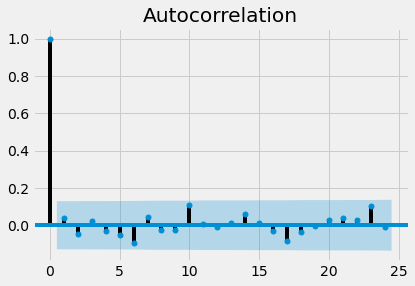

In [ ]:
resid = modelo3_base1.resid
plot_acf(resid)
plt.show()

El gráfico nos da la idea de que los residuales no están correlacionados, ya que todos los lags caen dentro la banda de confianza.

In [ ]:
modelo3_base1.summary().tables[2]

Ljung-Box (L1) (Q):,0.33,Jarque-Bera (JB):,1.59
Prob(Q):,0.56,Prob(JB):,0.45
Heteroskedasticity (H):,1.21,Skew:,0.07
Prob(H) (two-sided):,0.40,Kurtosis:,2.62


NOTE QUE: El test de Ljung-Box aparentemente solo aplica para ver si hay autocorrelación a un lag, es decir, entre  $X_t$  y  $X_{t−1}$ . En este caso  h=1 , pero también es posible verificar para  h>1, como se muestra a continuación :





In [ ]:
sm.stats.acorr_ljungbox(modelo3_base1.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.339442,0.560151
2,0.911694,0.633911
3,1.057063,0.787448
4,1.302026,0.861032
5,2.016187,0.846901
6,4.308090,0.635060
7,4.822493,0.681615
8,4.949330,0.762978
9,5.082445,0.827063
10,7.828782,0.645557


Como el p-valor de los 10 primeros lasg son mayores 0.05=$\alpha$ entonces nos quedamos con la hipótesis nula $H_0:$ Los residuos se distribuyen de forma independiente, es decir no existe correlación entre ellos.

### 7.
Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

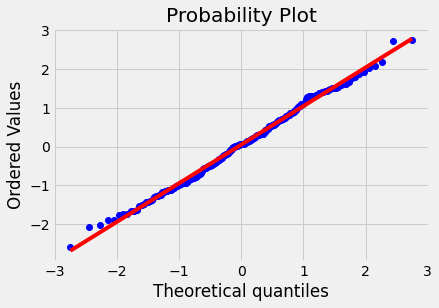

In [ ]:
resid = modelo3_base1.resid
stats.probplot(resid, dist="norm", plot=pylab)
pylab.show()

Podemos notar que los residuales se ajustan cerca a la recta de referencia. Lo anterior nos da la idea de que los residuales se distribuyen normal. Sin embargo, para confirmar se realizará la prueba con Jarque-Bera(JB).
La prueba de hipótesis, está dada por:

$$H0 : \varepsilon_{ij} \sim Normal$$
$$Versus$$
$$Ha: \varepsilon_{ij} \nsim Normal$$

In [ ]:
stats.jarque_bera(modelo3_base1.resid)

Jarque_beraResult(statistic=1.5204363350845262, pvalue=0.4675644085038976)

Con el gráfico anterior y el valor-p=0.467564 > $0.05=\alpha$ de la prueba de normalidad, se concluye que los errores del modelo de series de tiempo propuesto se distribuyen normal.

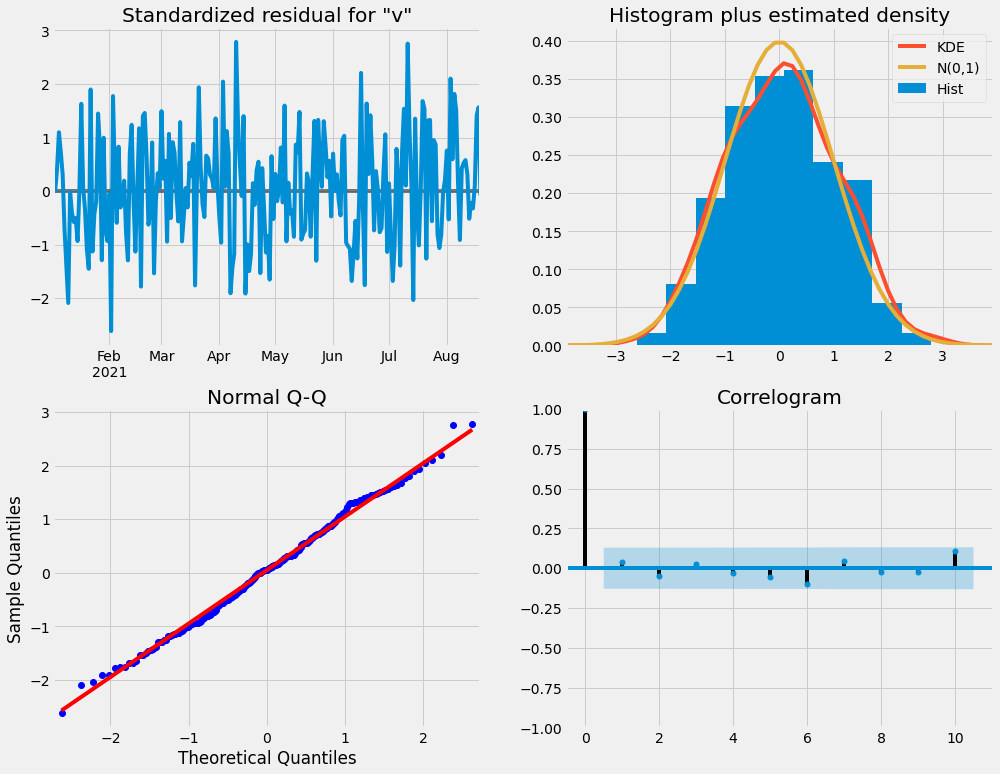

In [ ]:
modelo3_base1.plot_diagnostics(figsize=(15,12))
plt.show()

Al observar el gráfico de los residuales podemos observar que estos tienen media cero y  varianza constante, respecto al histograma podemos observar que la densidad de estos datos dan la forma de una distribución normal.

### 8.
Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [ ]:
pred = modelo3_base1.get_forecast(5)
pred_ci = pred.conf_int()
pred_ci

,lower valor,upper valor
2021-08-20,20.166777,24.047314
2021-08-21,17.384726,25.891270
2021-08-22,16.411976,27.845630
2021-08-23,16.336440,29.274567
2021-08-24,15.682681,29.954565


In [ ]:
pred.predicted_mean

2021-08-20    22.107046
2021-08-21    21.637998
2021-08-22    22.128803
2021-08-23    22.805504
2021-08-24    22.818623
Freq: D, Name: predicted_mean, dtype: float64

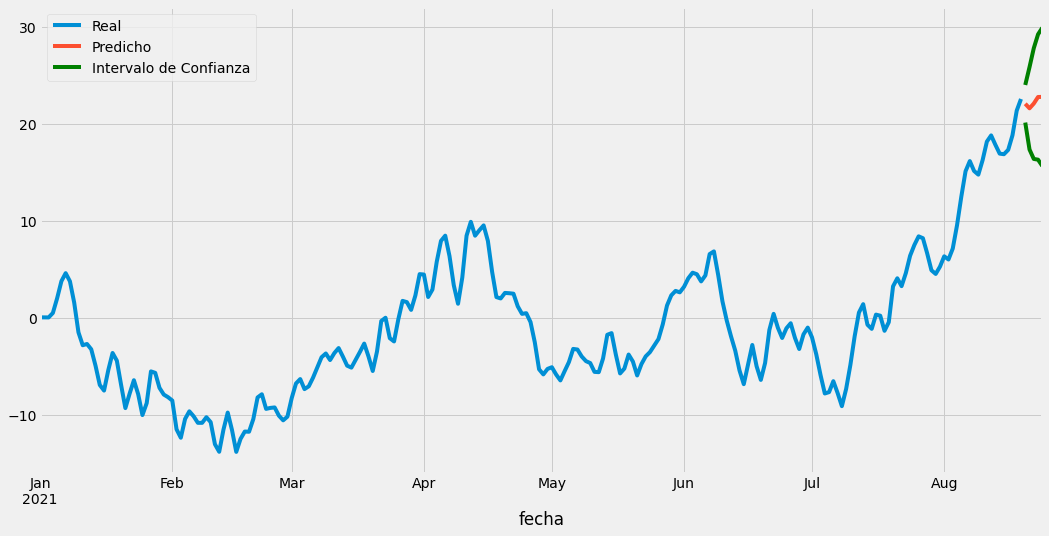

In [ ]:
plt.figure(figsize=(16,8))  #  Graficamos:
base1.valor.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

El pronóstico un paso al futuro, es decir para el 2021-08-20 es de 22.107046 y puede variar con una confianza del 95\% entre (20.166777	,24.047314).

Cabe resaltar que a medida que se aleja cada pronósticos el intervalo de confianza va aumentar, perdiendo así precisión.

De igual forma se interpretaría para los cuatro pronósticos restantes.


### SERIE 2

In [ ]:
base2= pd.read_excel("/content/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
#par-dates decirle cual variable tiene fecha


In [ ]:
base2.shape #dimensiones, coinciden con la base

(521, 2)

In [ ]:
base2.head()

,date,value
0,2020-01-01,-0.89
1,2020-01-02,-0.99
2,2020-01-03,-1.62
3,2020-01-04,-1.13
4,2020-01-05,-0.91


In [ ]:
base2.tail()

,date,value
516,2021-05-31,-92.78
517,2021-06-01,-91.90
518,2021-06-02,-92.96
519,2021-06-03,-92.96
520,2021-06-04,-94.24


In [ ]:
base2.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [ ]:
base2.sort_values(by="date",inplace=True)#ordenar por fecha de manera ascendente

In [ ]:
base2["day"] = pd.DatetimeIndex(base2["date"]).day
base2["week_day"] = pd.DatetimeIndex(base2["date"]).weekday # 0 es lunes, 1 es martes, ...,  domingo es 6
# Podemos cambiarlo con:

day_aux1 = base2.week_day.unique()
day_aux2 = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

base2.week_day.replace(to_replace=day_aux1, value=day_aux2, inplace=True)

base2["month"] = pd.DatetimeIndex(base2["date"]).month
base2["year"] = pd.DatetimeIndex(base2["date"]).year

In [ ]:
base2

,date,value,day,week_day,month,year
0,2020-01-01,-0.89,1,Monday,1,2020
1,2020-01-02,-0.99,2,Tuesday,1,2020
2,2020-01-03,-1.62,3,Wednesday,1,2020
3,2020-01-04,-1.13,4,Thursday,1,2020
4,2020-01-05,-0.91,5,Friday,1,2020
...,...,...,...,...,...,...
516,2021-05-31,-92.78,31,Saturday,5,2021
517,2021-06-01,-91.90,1,Sunday,6,2021
518,2021-06-02,-92.96,2,Monday,6,2021
519,2021-06-03,-92.96,3,Tuesday,6,2021


In [ ]:
base2.set_index("date", inplace=True)

Obtenemos la serie de tiempo:

In [ ]:
base2_aux = base2[["value"]].squeeze("columns")
base2_aux

date
2020-01-01    -0.89
2020-01-02    -0.99
2020-01-03    -1.62
2020-01-04    -1.13
2020-01-05    -0.91
              ...  
2021-05-31   -92.78
2021-06-01   -91.90
2021-06-02   -92.96
2021-06-03   -92.96
2021-06-04   -94.24
Name: value, Length: 521, dtype: float64

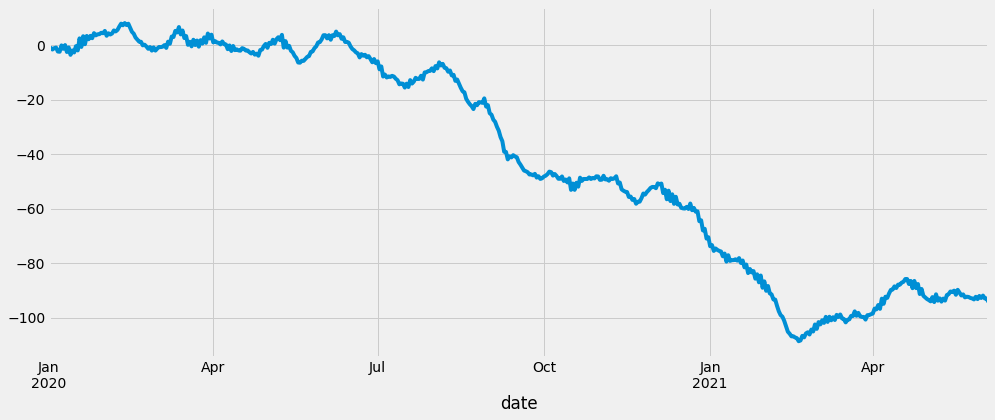

In [ ]:
base2_aux.plot(figsize=(15, 6))
plt.show()

### 1.
Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

In [ ]:
acf(base2_aux)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.99651655, 0.99389224, 0.99023441, 0.98719012,
       0.9833168 , 0.97999462, 0.97603285, 0.97235987, 0.96820653,
       0.96433027, 0.96016817, 0.95628529, 0.9522009 , 0.94833941,
       0.94427459, 0.94035454, 0.93629698, 0.93230052, 0.92808004,
       0.92392249, 0.91967468, 0.91541144, 0.91099342, 0.90657147,
       0.90194926, 0.89729957, 0.89254708, 0.88780339, 0.88300861,
       0.8782625 , 0.87334317, 0.86842533, 0.8635148 , 0.85849897,
       0.8535693 , 0.84853542, 0.84351598, 0.83856007, 0.83349222,
       0.8284747 ])

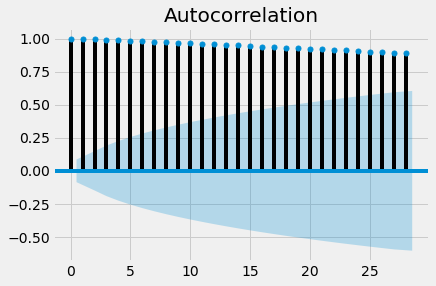

In [ ]:
plot_acf(base2_aux)
plt.show()
#decaimiento exponencial, tendencia

En la ACF se puede observar un decaimiento exponencial que va lentamente a cero, lo cual nos da una idea de una posible tendencia, es decir que la serie es NO estacionaria y habrá que agregar alguna diferenciación $d$, la anterior idea se probará en los siguientes ítems con la prueba de dickey-fuller.

In [ ]:
pacf(base2_aux, method="ywm")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.00000000e+00,  9.96516555e-01,  1.21787265e-01, -1.36745345e-01,
        5.57925121e-02, -8.89679558e-02,  3.95373334e-02, -5.37556587e-02,
       -9.78287676e-04, -3.51627384e-02,  5.60388827e-03, -1.00059537e-02,
        1.36785810e-02, -3.98714866e-03,  9.00637491e-03, -1.00867787e-02,
       -4.66372272e-04, -4.37358560e-03, -9.09460066e-03, -2.33466585e-02,
       -7.22543416e-03, -2.36582530e-03, -1.37305651e-02, -1.70100782e-02,
       -9.98149619e-03, -2.36288477e-02, -1.29524371e-02, -8.08178372e-03,
       -5.31946566e-03, -1.62821846e-03,  2.03772681e-03, -2.16071298e-02,
       -8.81724096e-03,  7.43432682e-03, -2.10412505e-02,  1.13777114e-02,
       -1.46313241e-02, -5.52218967e-03,  1.35588335e-02, -2.09484644e-02,
        4.34259126e-03])

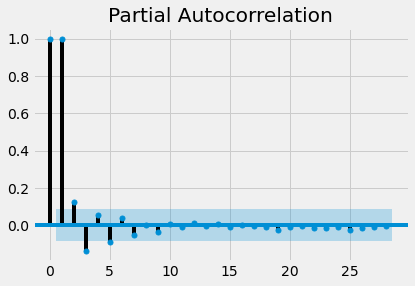

In [ ]:
plot_pacf(base2_aux,method="ywm")
plt.show()

La PACF muestra corte en los lags: 1, 2 y 3.

Teniendo en cuenta lo observado en la ACF y PACF, se sugiere un modelo ARIMA, con componente AR(p), con $p \geq 1$, con alguna una diferenciación, debido a que la ACF indicó tendencia.


### 2.
Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

Al realizar el gráfico de la serie de tiempo original, se observa
que no tiene una media constante (los valores no oscilan horizontalmente
alrededor de un valor fijo), por lo que se procede a realizar la prueba de Dickey- Fuller, para ver si es necesario tomar diferencias.

Las hipótesis por contrastar son:

$$H_0: \gamma=0 \text{ versus  } H_a: \gamma<0$$

Esto también se puede expresar como:

$$H_0 : \text{NO estacionariedad versus   } H_a : \text{ Estacionariedad}$$


In [ ]:
adfuller(base2_aux)

(-0.18282635528006955,
 0.9405379503085114,
 3,
 517,
 {'1%': -3.443061925077973,
  '5%': -2.8671466525252014,
  '10%': -2.5697561378507907},
 1398.8162639808165)

Como el p-valor=0.9405379503085114 > 0.05=$\alpha$ entonces nos quedamos con la hipótesis nula $H_0:$ Existe una raíz unitaria, no estacionaria. Esto implica que debemos tomar una diferencia:

In [ ]:
base2_aux_dif = base2_aux.diff()

In [ ]:
base2_aux_dif.dropna(inplace=True) # Quitar Na´s

Hasta ahora $d \geq 1$

In [ ]:
adfuller(base2_aux_dif)

(-7.524055501820424,
 3.724992856728212e-11,
 2,
 517,
 {'1%': -3.443061925077973,
  '5%': -2.8671466525252014,
  '10%': -2.5697561378507907},
 1395.0181874557543)

Como el p-valor= 3.724992856728212e-11 < 0.05=$\alpha$ entonces nos quedamos con la hipótesis alternativa $H_a:$ No existe una raíz unitaria. Esto implica que no debemos tomar una segunda diferencia y el parámetro d=1 en el modelo ARIMA(p, d, q).

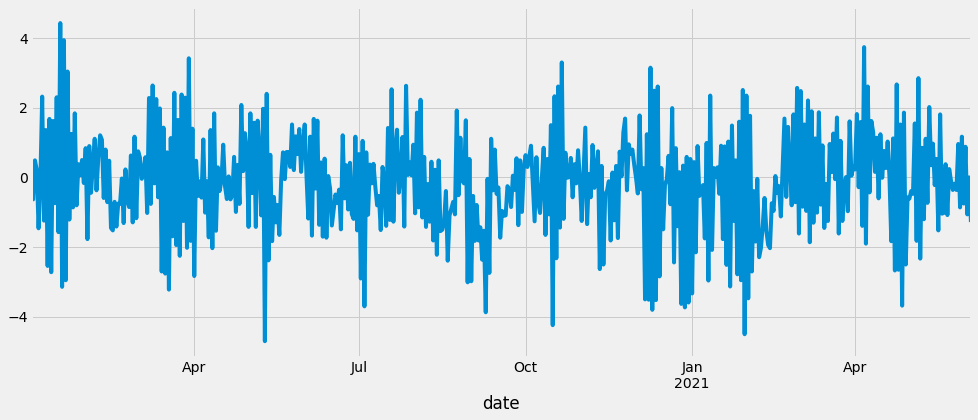

In [ ]:
base2_aux_dif.plot(figsize=(15, 6))
plt.show()

Se puede observar que al aplicar diferenciación se elimina la tendencia de la serie. Los valores de la serie están oscilando alrededor del cero, por lo que el proceso ya tienen media constante (estacionario).

### 3.
Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [ ]:
acf(base2_aux_dif) #senoidal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.        , -0.54730667,  0.72339853, -0.40732577,  0.51222571,
       -0.31139906,  0.37777493, -0.25450728,  0.31690679, -0.23657804,
        0.27906121, -0.24886199,  0.22286208, -0.23515541,  0.20156692,
       -0.21091111,  0.18158063, -0.1610661 ,  0.16537284, -0.12381582,
        0.12473072, -0.09833451,  0.08926739, -0.07136587,  0.06025394,
       -0.02622789,  0.03205677,  0.02016646, -0.02138122,  0.04023304,
       -0.02095815,  0.037616  , -0.03126571,  0.04766665, -0.04264329,
        0.07123936, -0.0378904 ,  0.06751414, -0.0430483 ,  0.07651294,
       -0.07199641])

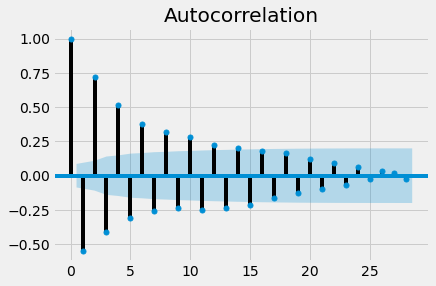

In [ ]:
plot_acf(base2_aux_dif)
plt.show()  # senoidal

Observando la ACF muestral obtenida aplicando una diferenciación se puede notar un comportamiento senoidal, es decir una cola.

In [ ]:
pacf(base2_aux_dif, method="ywm")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.        , -0.54730667,  0.60511195,  0.18064126,  0.02923306,
       -0.02061697,  0.01835207, -0.02616588,  0.06775348, -0.02640371,
        0.0157089 , -0.08022796, -0.08620116, -0.04786765,  0.04210561,
        0.02188059,  0.01737046,  0.05422269,  0.04796422,  0.03507829,
       -0.02811703, -0.01581857, -0.02736641,  0.00137139, -0.02531869,
        0.05018229,  0.00183798,  0.04973665, -0.05373386, -0.02450911,
        0.06236971,  0.03160452, -0.02890347,  0.0072088 , -0.01725777,
        0.02508896,  0.05336946,  0.00143693, -0.01011189,  0.02263463,
       -0.0513041 ])

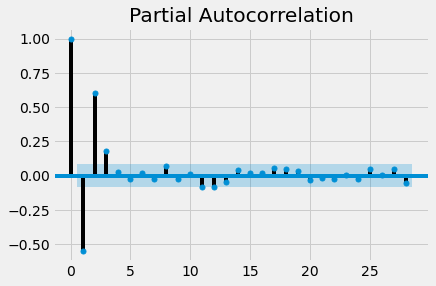

In [ ]:
plot_pacf(base2_aux_dif,method="ywm")
plt.show()

Observando la PACF muestral se puede decir que hay corte en los lags: 1, 2 y 3.

Teniendo en cuenta lo anterior, pensaremos en un modelo ARIMA(p,d,q), con componentes en p y d, para q sería cero, ya que no se notó parte MA.

### 4.
Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

### MODELOS PROPUESTOS
$\bullet$ El primer modelo a proponer es un ARIMA(1,1,0), ya que en la PACF notamos un corte en el lag 1, se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.

In [ ]:
modelo1_base2 = ARIMA(base2_aux, order=(1,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El segundo modelo a proponer es un ARIMA(2,1,0), ya que en la PACF notamos un corte en el lag 2, se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.

In [ ]:
modelo2_base2 = ARIMA(base2_aux, order=(2,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El tercer modelo a proponer es un ARIMA(3,1,0), ya que en la PACF notamos un corte en el lag 3, se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.

In [ ]:
modelo3_base2 = ARIMA(base2_aux, order=(3,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
print(modelo1_base2.aic,modelo2_base2.aic, modelo3_base2.aic)
print(modelo1_base2.bic, modelo2_base2.bic, modelo3_base2.bic)

1739.318754312867 1486.4073384349326 1469.4503753935314
1747.8264119360178 1499.1688248696591 1486.4656906398334


El "mejor" modelo es el 3 ya que respecto con los otros modelos tiene el menor __AIC__=1469.4503753935314 y __BIC__=1486.4656906398334.



In [ ]:
modelo3_base2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.3155,0.049,-6.463,0.000,-0.411,-0.220
ar.L2,0.6594,0.035,18.585,0.000,0.590,0.729
ar.L3,0.1889,0.047,4.058,0.000,0.098,0.280
sigma2,0.9703,0.054,17.910,0.000,0.864,1.077


El "mejor" modelo propuesto, está dado por:
$$
\begin{aligned}
& A R I M A(p, d, q) \rightarrow A R IMA(3, 1, 0) \\
& (1-B)^{d} \phi(B) \times x_t=\theta(B) w_{t} \\
& (1-B)\left(1-\phi_{ 1}B-\phi_{2} B^{2}-\phi_{3} B^{3}\right) \times x_t=w_{t} \\
& (1-B)\left(x_{t}-\phi_{1} x_{t-1}-\phi_{2} x_{t-2}-\phi_{3}x_{t-3} \right)=w_{t} \\
& x_{t}-\phi_{1} x_{t-1}-\phi_{2} x_{t-2}-\phi_{3} x_{t-3}-x_{t-1}+\phi_{1} x_{t-2} +\phi_{2} x_{t-3}+\phi_{3} x_{t-4}=w_ t \\
& \hat{x_{t}}=\left(\hat{\phi_{1}}+1\right) x_{t-1}+\left(\hat{\phi_{2}}-\hat{\phi_{1}}\right) x_{t-2} + \left(\hat{\phi_{3}}-\hat{\phi_{2}}\right) x_{t-3}-\hat{\phi_{3}} x_{t-4}
\end{aligned}
$$

Donde $\hat{\phi_{1}}=-0.3155, \hat{\phi_{2}}= 0.6594 \text{ y   } \hat{\phi_{3}}=	0.1889$

### 5.
Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [ ]:
modelo3_base2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.3155,0.049,-6.463,0.000,-0.411,-0.220
ar.L2,0.6594,0.035,18.585,0.000,0.590,0.729
ar.L3,0.1889,0.047,4.058,0.000,0.098,0.280
sigma2,0.9703,0.054,17.910,0.000,0.864,1.077


- El proceso $ARIMA(p,d,q)$ es estacionario si las raíces unitarias (las cuales pueden ser números complejos) de
$$
\phi(B)=1+0.3155-0.6594B^2-0.1889^3=0
$$
están fuera del círculo unitario.


In [ ]:
coeff=[-0.1889,-0.6594,0.3155,1]
abs(np.roots(coeff))

array([3.54011849, 1.24779602, 1.19841337])

Como las raíces del polinomio $\phi(B)$ están por fuera del círculo unitario, podemos decir que el proceso ARIMA(3,1,0) es estacionario e invertible.

### 6.
Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


Las hipótesis a aprobar serán:

$$H0 : \rho_1(w) = \rho_2(w) = · · · = \rho_{10}(w) = 0 $$
$$Vs$$
$$Ha:\rho_j(w) \neq \text{para algún j} \in (1,2,..10)$$

Esto también se puede expresar como:

$$H_0 : \text{Los residuos se distribuyen de forma independiente.}$$
$$Vs$$
$$H_a : \text{ Los residuos no se distribuyen de forma independiente}$$



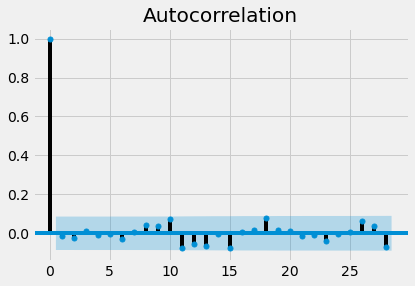

In [ ]:
resid = modelo3_base2.resid
plot_acf(resid)
plt.show()

El gráfico nos da la idea de que los residuales no estan correlacionados, ya que todos los lags caen dentro la banda de confianza.

In [ ]:
modelo3_base2.summary().tables[2]

Ljung-Box (L1) (Q):,0.12,Jarque-Bera (JB):,7.11
Prob(Q):,0.73,Prob(JB):,0.03
Heteroskedasticity (H):,0.98,Skew:,-0.17
Prob(H) (two-sided):,0.88,Kurtosis:,3.46


NÓTESE QUE: El test de Ljung-Box aparentemente solo aplica para ver si hay autocorrelación a un lag, es decir, entre  $X_t$  y  $X_{t−1}$ . En este caso  h=1 , pero también es posible verificar para  h>1, como se muestra a continuación

In [ ]:
sm.stats.acorr_ljungbox(modelo3_base2.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.122619,0.726211
2,0.425716,0.808271
3,0.483302,0.922544
4,0.503890,0.973121
5,0.521027,0.991333
6,0.963940,0.986942
7,0.999804,0.994832
8,1.918770,0.983402
9,2.569351,0.978960
10,5.329654,0.868098


Como el p-valor de los 10 primeros lags son mayores 0.05=$\alpha$ entonces nos quedamos con la hipótesis nula $H_0:$ Los residuos se distribuyen de forma independiente, es decir no existe correlación entre ellos.

### 7.
Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

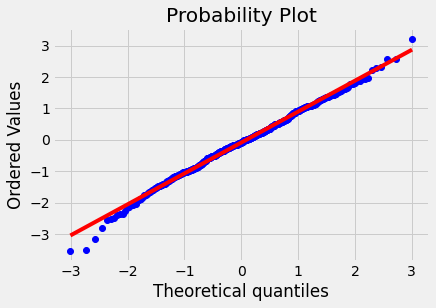

In [ ]:
resid = modelo3_base2.resid
stats.probplot(resid, dist="norm", plot=pylab)
pylab.show()

Podemos notar que los residuales se ajustan cerca a la recta de referencia, excepto que hay algunos de ellos en la cola donde la recta no los acobija del todo. Lo anterior nos da la idea de que los residuales se distribuyen normal. Sin embargo, para confirmar se realizará la prueba con Jarque-Bera(JB).
La prueba de hipótesis para verificar la normalidad de los residuales, está dada por:

$$H0 : \varepsilon_{ij} \sim Normal$$
$$Versus$$
$$Ha: \varepsilon_{ij} \nsim Normal$$

In [ ]:
stats.jarque_bera(modelo3_base2.resid)

Jarque_beraResult(statistic=6.894997766283581, pvalue=0.03182513530099318)

Con el valor-p=0.0318251 < $0.05=\alpha$ de la prueba de normalidad, se concluye que los errores del modelo de series de tiempo propuesto NO se distribuyen normal,es importante tener en cuenta que esta prueba es muy estricta.

Pero, incialmente el gráfico mostró normalidad de los residuales, así que se llevó a cabo otro test de normalidad con la prueba de shapiro-wilk, los resultados obtenidos fueron:

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(modelo3_base2.resid)
shapiro_test

ShapiroResult(statistic=0.9957191944122314, pvalue=0.16664007306098938)

Con el valor-p=0.16664 > $0.05=\alpha$ de la prueba de normalidad, se concluye que los errores del modelo de series de tiempo propuesto se distribuyen normal.

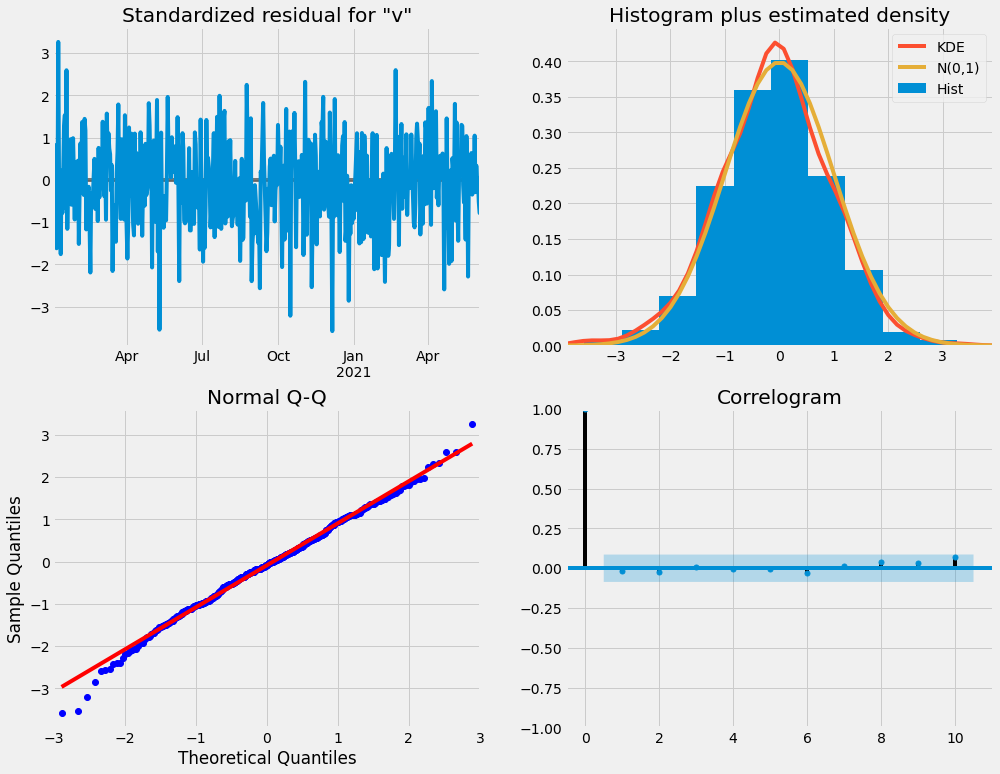

In [ ]:
modelo3_base2.plot_diagnostics(figsize=(15,12))
plt.show()

Al observar el gráfico de los residuales podemos observar que estos tienen media cero y  varianza constante, respecto al histograma podemos observar que la densidad de estos datos dan la forma de una distribución normal.

### 8.
Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [ ]:
pred = modelo3_base2.get_forecast(5)
pred_ci = pred.conf_int()
pred_ci

,lower value,upper value
2021-06-05,-95.967071,-92.105757
2021-06-06,-97.284231,-92.605017
2021-06-07,-98.404273,-91.127087
2021-06-08,-99.680421,-91.084592
2021-06-09,-100.657739,-89.825261


In [ ]:
pred.predicted_mean

2021-06-05   -94.036414
2021-06-06   -94.944624
2021-06-07   -94.765680
2021-06-08   -95.382506
2021-06-09   -95.241500
Freq: D, Name: predicted_mean, dtype: float64

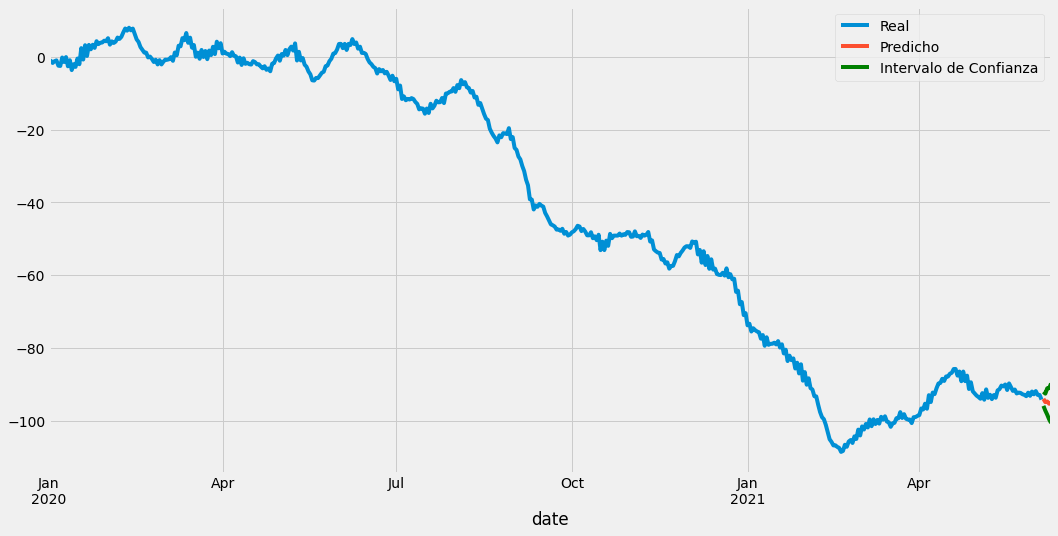

In [ ]:
plt.figure(figsize=(16,8))  #  Graficamos:
base2.value.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

El pronóstico un paso al futuro, es decir para el 2021-06-05 es de -94.036414 y puede variar con una confianza del 95\% entre (-95.967071,-92.105757), con un nivel de significancia del 0.05.


Cabe resaltar que a medida que se aleja cada pronósticos el intervalo de confianza va aumentar, perdiendo así precisión.

De igual forma se interpretaría para los cuatro pronósticos restantes.

###**SERIE 3**

In [ ]:
base3= pd.read_excel("/content/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])
#par-dates decirle cual variable tiene fecha

In [ ]:
base3.shape

(837, 2)

In [ ]:
base3.head()

,dia,registro
0,2020-03-07,-54.21
1,2019-07-24,26.12
2,2020-07-10,-16.74
3,2019-06-19,-1.54
4,2019-04-01,-1.67


In [ ]:
base3.tail()

,dia,registro
832,2019-02-17,0.35
833,2019-04-17,-13.90
834,2021-04-14,-52.95
835,2019-03-25,-12.94
836,2019-08-19,42.46


In [ ]:
base3.dtypes

dia         datetime64[ns]
registro           float64
dtype: object

In [ ]:
base3.rename(columns={"dia": "fecha"}, inplace=True)

In [ ]:
base3

,fecha,registro
0,2020-03-07,-54.21
1,2019-07-24,26.12
2,2020-07-10,-16.74
3,2019-06-19,-1.54
4,2019-04-01,-1.67
...,...,...
832,2019-02-17,0.35
833,2019-04-17,-13.90
834,2021-04-14,-52.95
835,2019-03-25,-12.94


In [ ]:
base3["dia"] = pd.DatetimeIndex(base3["fecha"]).day
base3["dia_sem"] = pd.DatetimeIndex(base3["fecha"]).weekday # 0 es lunes, 1 es martes, ...,  domingo es 6
# Podemos cambiarlo con:

dia_aux1 = base3.dia_sem.unique()
dia_aux2 = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado","Domingo"]

base3.dia_sem.replace(to_replace=dia_aux1, value=dia_aux2, inplace=True)

base3["mes"] = pd.DatetimeIndex(base3["fecha"]).month
base3["anio"] = pd.DatetimeIndex(base3["fecha"]).year
base3.head()

,fecha,registro,dia,dia_sem,mes,anio
0,2020-03-07,-54.21,7,Lunes,3,2020
1,2019-07-24,26.12,24,Martes,7,2019
2,2020-07-10,-16.74,10,Miércoles,7,2020
3,2019-06-19,-1.54,19,Martes,6,2019
4,2019-04-01,-1.67,1,Jueves,4,2019


Ordenamos por fecha:

In [ ]:
base3.sort_values(by='fecha', inplace=True)

In [ ]:
base3.set_index("fecha", inplace=True)

Obtención de la serie de tiempo:

In [ ]:
base3_aux = base3[["registro"]].squeeze("columns")
base3_aux

fecha
2019-01-01     1.37
2019-01-02     3.65
2019-01-03     5.86
2019-01-04    10.57
2019-01-05    14.17
              ...  
2021-04-12   -59.77
2021-04-13   -56.04
2021-04-14   -52.95
2021-04-15   -52.33
2021-04-16   -53.02
Name: registro, Length: 837, dtype: float64

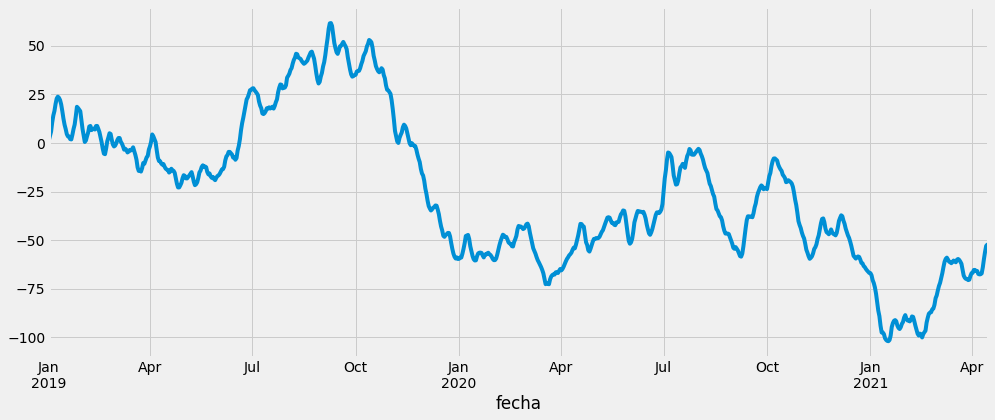

In [ ]:
base3_aux.plot(figsize=(15, 6))
plt.show()


### 1.
Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

In [ ]:
acf(base3_aux)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.99799261, 0.99380988, 0.98806817, 0.98112657,
       0.97382558, 0.96660553, 0.95949007, 0.95250144, 0.94559652,
       0.93875801, 0.93193914, 0.92508738, 0.91826207, 0.91139392,
       0.90434754, 0.89708975, 0.88957213, 0.88176315, 0.8737343 ,
       0.86567404, 0.85768796, 0.84979361, 0.84206625, 0.83459001,
       0.82726513, 0.8199757 , 0.81271795, 0.80539622, 0.79795124,
       0.79038785, 0.78278851, 0.77524666, 0.767799  , 0.76042638,
       0.7531688 , 0.74597619, 0.7387651 , 0.73151457, 0.72418271,
       0.71673352])

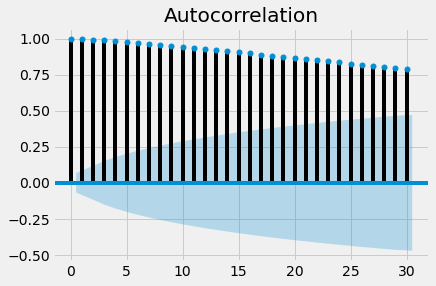

In [ ]:
plot_acf(base3_aux)
plt.show()
#decaimiento exponencial, tendencia

En la ACF podemos notar un decaimiento exponencial que va lentamente a cero, lo cual nos da una idea de tendencia.

In [ ]:
pacf(base3_aux, method="ywm")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.        ,  0.99799261, -0.54338252, -0.13794363, -0.06820711,
        0.17391902,  0.08514811, -0.04094954, -0.052545  , -0.02638892,
        0.02920303,  0.00697038, -0.01781601,  0.00852429, -0.0288089 ,
       -0.05108756, -0.02770594, -0.01889947, -0.01088948,  0.00327644,
        0.04220142,  0.01592777, -0.02001469,  0.00140032,  0.03379175,
       -0.0113535 , -0.03638874, -0.00652812, -0.01694325, -0.00658988,
       -0.00927113,  0.02190244,  0.03112179,  0.00554023, -0.02746407,
        0.00108506, -0.00713491, -0.01972061, -0.01723855, -0.01652475,
       -0.01227972])

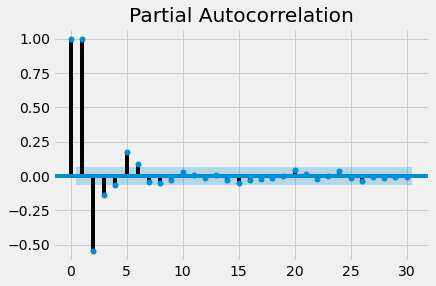

In [ ]:
plot_pacf(base3_aux,method="ywm")
plt.show()

La PACF nos muestra corte en los lags: 1, 2, 3 y 5.

Lo observado en la ACF Y PACF da indicios de un modelo ARIMA, con componente AR(p), con $p \geq 1$, donde se debe aplicar por lo menos una diferenciación, ya que el ACF evidenció tendencia.

### 2.
Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

Al realizar el gráfico de la serie de tiempo original, se observa
que no tiene una media constante (los valores no oscilan horizontalmente
alrededor de un valor fijo), por lo que se procede a realizar el test de Dickey- Fuller, para ver si es necesario tomar diferencias.

Las hipótesis a constrastar son:

$$H_0: \gamma=0 \text{ versus  } H_a: \gamma<0$$

Esto también se puede expresar como:

$$H_0 : \text{NO estacionariedad versus   } H_a : \text{ Estacionariedad}$$

In [ ]:
adfuller(base3_aux)

(-1.5245498354698472,
 0.5213338273526291,
 19,
 817,
 {'1%': -3.438379332805805,
  '5%': -2.865084115496387,
  '10%': -2.5686571948451586},
 2352.050043743141)

Como el p-valor=0.5213338273526291 > 0.05=$\alpha$ entonces nos quedamos con la hipótesis nula $H_0:$ Existe una raíz unitaria, es decir no estacionariedad. Esto implica que debemos tomar una diferencia:

In [ ]:
base3_aux_dif = base3_aux.diff()

In [ ]:
base3_aux_dif.dropna(inplace=True) # Quitar Na´s

Realizando nuevamente la prueba de dickey-fuller obtenemos:

In [ ]:
adfuller(base3_aux_dif)

(-6.0876204755562435,
 1.0550731533337972e-07,
 18,
 817,
 {'1%': -3.438379332805805,
  '5%': -2.865084115496387,
  '10%': -2.5686571948451586},
 2348.977389255808)

Como el p-valor=  1.0550731533337972e-07 < 0.05=$\alpha$ entonces nos quedamos con la hipótesis alternativa $H_a:$ No existe una raíz unitaria, es decir tenemmos estacionariedad. Esto implica que no debemos tomar una segunda diferencia y el parámetro d será 1 en el modelo ARIMA(p, d, q).

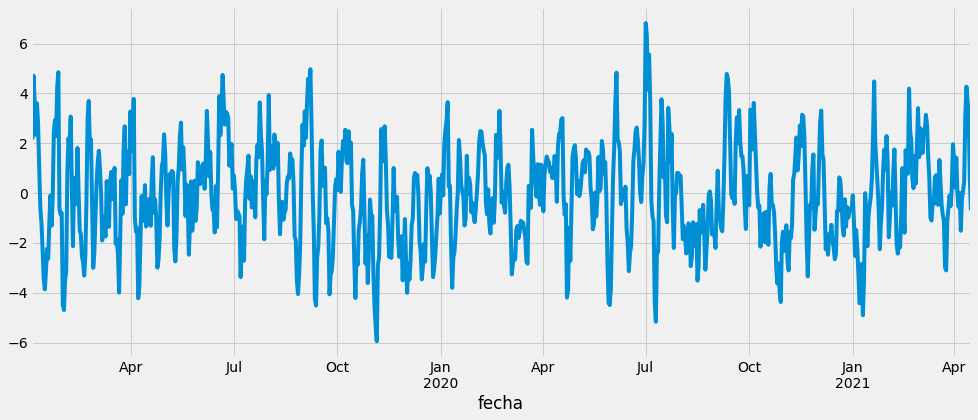

In [ ]:
base3_aux_dif.plot(figsize=(15, 6))
plt.show()

Nótese que al aplicar diferenciación se elimina la tendencia de la serie. Los valores de la serie están oscilando al rededor del cero, por lo que el proceso ya tienen media constante.


### 3.
Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [ ]:
acf(base3_aux_dif) #senoidal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.00000000e+00,  7.70143686e-01,  5.37613572e-01,  3.67517674e-01,
        6.80520105e-02, -8.52404927e-02, -9.39232298e-02, -7.32674146e-02,
       -4.04529329e-02, -1.90135071e-02,  1.32627770e-02,  2.78863005e-02,
        2.06576453e-02,  4.43649794e-02,  7.55100234e-02,  9.03880106e-02,
        1.01333195e-01,  9.60659577e-02,  7.65770450e-02,  2.46297706e-02,
       -2.59556414e-02, -4.90124256e-02, -7.55018366e-02, -8.39429829e-02,
       -6.46590749e-02, -4.33238562e-02, -6.52466429e-04,  3.22865578e-02,
        4.59921850e-02,  6.55292884e-02,  5.26749534e-02,  9.08989428e-03,
       -1.61390454e-02, -3.97866749e-02, -5.64649450e-02, -3.70005738e-02,
       -9.77292388e-03,  1.88706202e-02,  3.95102179e-02,  2.37286052e-02,
        1.71864065e-02])

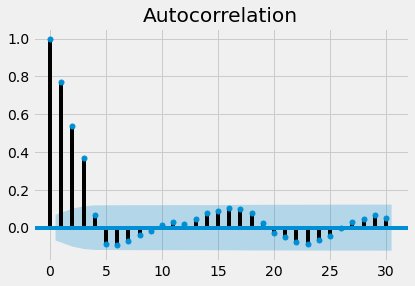

In [ ]:
plot_acf(base3_aux_dif)
plt.show()  # senoidal

Observando la ACF muestral obtenida aplicando una diferenciación se puede notar un comportamiento senoidal, es decir una cola.

Pero, también podemos notar que sobresale un corte en el lag 3.

In [ ]:
pacf(base3_aux_dif, method="ywm")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.        ,  0.77014369, -0.13642327,  0.00515606, -0.45596103,
        0.20259099,  0.09616208,  0.19757576, -0.22015856, -0.10828129,
        0.05414265,  0.16217338,  0.0263485 , -0.04088   , -0.02478265,
        0.06559337,  0.04887476, -0.02363029, -0.03217932, -0.09298977,
        0.03562636,  0.02418241,  0.00563773, -0.05998965, -0.02080933,
        0.03049222,  0.1269255 , -0.03134964, -0.06271419, -0.03408465,
        0.03427259, -0.01584969, -0.0067736 , -0.04248124,  0.0335664 ,
        0.06410856,  0.0122071 , -0.00612514, -0.0448359 , -0.05551824,
        0.07708857])

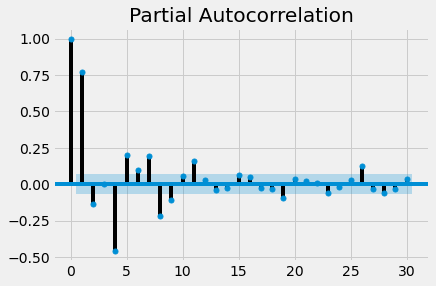

In [ ]:
plot_pacf(base3_aux_dif,method="ywm")
plt.show()


En la ACF se puede notar varios cortes, resaltando los lags: 1, 2, 3 y 4.

En la PACF se puede notar varios cortes, resaltando los lags: 1, 4 y 5.

Teniendo en cuenta lo anterior, pensaremos en un modelo ARIMA(p,d,q), con componentes en p y d.

### 4.
Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

Como se explico anteriormente, se aplicará un modelo ARIMA(p,d,q), para los modelos propuestos iremos variando el $p$ en los lags: 1, 4 y 5, ya que fueron los cortes que más sobresalieron a nuestro críterio en la PACF, con $d=1$ y un $q$ desde el 1 hasta el 4, ya que se notó un corte es estos lags.

A continuación se presentan los modelos qué presentan un menor AIC y BIC:

### MODELOS PROPUESTOS

$\bullet$ El primer modelo a proponer es un ARIMA(1,1,0), ya que en la PACF notamos un corte en el lag 1, se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.

In [ ]:
modelo1_base3 = ARIMA(base3_aux, order=(1,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El segundo modelo a proponer es un ARIMA(4,1,0), ya que en la PACF notamos un corte en el lag 4, se comprobó que se necesita una diferencia $d=1$ y no se notó parte de un MA.

In [ ]:
modelo2_base3 = ARIMA(base3_aux, order=(4,1,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El tercer modelo a proponer es un ARIMA(5,1,3), ya que en la PACF notamos un corte en el lag 5, se comprobó que se necesita una diferencia $d=1$ y también sobresale un corte en la ACF en el lag 3.






In [ ]:
modelo3_base3 = ARIMA(base3_aux, order=(5,1,3)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


$\bullet$ El cuarto modelo a proponer es un ARIMA(5,1,1), ya que en la PACF notamos un corte en el lag 5, se comprobó que se necesita una diferencia $d=1$ y se notó un corte en la ACF en el lag 1.

In [ ]:
modelo4_base3 = ARIMA(base3_aux, order=(5,1,1)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El quinto modelo a proponer es un ARIMA(0,1,4), ya que en la ACF notamos un corte en el lag 4, se comprobó que se necesita una diferencia $d=1$ y NO se notó la parte AR.

In [ ]:
modelo5_base3 = ARIMA(base3_aux, order=(0,1,4)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


$\bullet$ El sexto modelo a proponer es un ARIMA(1,1,4), ya que en la ACF notamos un corte en el lag 4, se comprobó que se necesita una diferencia $d=1$ y en la ACF se notó un corte en el lag 1

In [ ]:
modelo6_base3 = ARIMA(base3_aux, order=(1,1,4)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
print(modelo1_base3.aic,modelo2_base3.aic,modelo3_base3.aic,modelo4_base3.aic,modelo5_base3.aic,modelo6_base3.aic)
print(modelo1_base3.bic, modelo2_base3.bic, modelo3_base3.bic, modelo4_base3.bic,modelo5_base3.bic,modelo6_base3.bic)

2778.395176472751 2569.0480420405142 2373.5615706173003 2534.94157848719 2364.7143385708964 2366.7143219177888
2787.8524336989203 2592.6911851059376 2416.1192281350627 2568.041978778783 2388.35748163632 2395.086093596297


El "mejor" modelo es el 5, ya que respecto con los otros modelos tiene el menor __AIC__=2364.7143385708964 y __BIC__= 2388.35748163632.

In [ ]:
modelo5_base3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,0.9389,0.029,32.284,0.000,0.882,0.996
ma.L2,0.7391,0.020,36.599,0.000,0.700,0.779
ma.L3,1.1171,0.020,55.331,0.000,1.077,1.157
ma.L4,0.5462,0.028,19.465,0.000,0.491,0.601
sigma2,0.9723,0.045,21.556,0.000,0.884,1.061


El modelo seleccionado ARIMA(0, 1, 4), está dado por:

$$(1-B)X_t=\theta(B)w_t$$

donde,
$$\theta(B)=1+0.9389+0.7391B^2+1.1171B^3+0.5462B^4$$



### 5.
Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [ ]:
modelo5_base3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,0.9389,0.029,32.284,0.000,0.882,0.996
ma.L2,0.7391,0.020,36.599,0.000,0.700,0.779
ma.L3,1.1171,0.020,55.331,0.000,1.077,1.157
ma.L4,0.5462,0.028,19.465,0.000,0.491,0.601
sigma2,0.9723,0.045,21.556,0.000,0.884,1.061


- El proceso $ARIMA(p,d,q)$ es estacionario si las raíces unitarias (las cuales pueden ser números complejos) de
$$\theta(B)=1+0.9389+0.7391B^2+1.1171B^3+0.5462B^4=0$$

están fuera del círculo unitario.


In [ ]:
coeff=[0.5462,1.1171,0.7391,0.9389,1]
abs(np.roots(coeff))

array([1.01883851, 1.01883851, 1.32806338, 1.32806338])

Como las raíces del polinomio $\theta(B)$ están por fuera del círculo unitario, podemos decir que el proceso ARIMA(0,1,4) es estacionario e invertible.

### 6.
Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


Las hipótesis a aprobar serán:

$$H0 : \rho_1(w) = \rho_2(w) = · · · = \rho_{10}(w) = 0 $$
$$Vs$$
$$Ha:\rho_j(w) \neq \text{para algún j} \in (1,2,..10)$$

Esto también se puede expresar como:

$$H_0 : \text{Los residuos se distribuyen de forma independiente.}$$
$$Vs$$
$$H_a : \text{ Los residuos no se distribuyen de forma independiente}$$


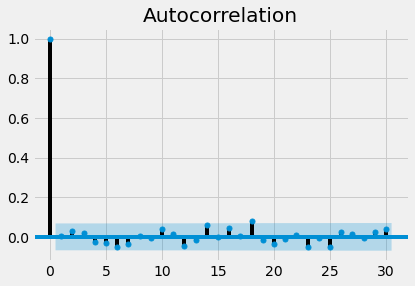

In [ ]:
resid = modelo5_base3.resid
plot_acf(resid)
plt.show()

El gráfico nos da la idea de que los residuales no estan correlacionados, ya que la mayoría de los lags caen dentro la banda de confianza.

In [ ]:
modelo5_base3.summary().tables[2]

Ljung-Box (L1) (Q):,0.00,Jarque-Bera (JB):,5.57
Prob(Q):,0.98,Prob(JB):,0.06
Heteroskedasticity (H):,0.88,Skew:,0.14
Prob(H) (two-sided):,0.29,Kurtosis:,3.29


NÓTESE QUE: El test de Ljung-Box aparentemente solo aplica para ver si hay autocorrelación a un lag, es decir, entre  $X_t$  y  $X_{t−1}$ . En este caso  h=1 , pero también es posible verificar para  h>1, como se muestra a continuación

In [ ]:
sm.stats.acorr_ljungbox(modelo5_base3.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.021156,0.884354
2,0.717259,0.698633
3,0.999822,0.801295
4,1.594777,0.809731
5,2.331050,0.801696
6,4.356672,0.628528
7,5.431313,0.607481
8,5.443968,0.709240
9,5.479166,0.790700
10,6.717028,0.751862


Como el p-valor de los 10 primeros lags son mayores 0.05=$\alpha$, entonces nos quedamos con la hipótesis nula $H_0:$ Los residuos se distribuyen de forma independiente, es decir no existe correlación entre ellos.

### 7.
Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

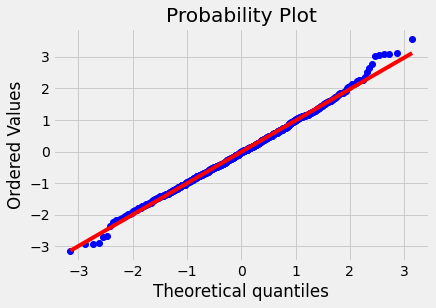

In [ ]:
resid = modelo5_base3.resid
stats.probplot(resid, dist="norm", plot=pylab)
pylab.show()

Podemos notar que los residuales se ajustan cerca a la recta de referencia. Lo anterior nos da la idea de que los residuales se distribuyen normal. Sin embargo, para confirmar se realizará la prueba con Jarque-Bera(JB).
La prueba de hipótesis para verificar la normalidad de los residuales, está dada por:

$$H0 : \varepsilon_{ij} \sim Normal$$
$$Versus$$
$$Ha: \varepsilon_{ij} \nsim Normal$$

In [ ]:
modelo5_base3.summary().tables[2]

Ljung-Box (L1) (Q):,0.00,Jarque-Bera (JB):,5.57
Prob(Q):,0.98,Prob(JB):,0.06
Heteroskedasticity (H):,0.88,Skew:,0.14
Prob(H) (two-sided):,0.29,Kurtosis:,3.29


Con el $valor-p=0.06 > 0.05=\alpha$ de la prueba de normalidad, se concluye que los errores del modelo de series de tiempo propuesto se distribuyen normal.

Tambien se quiso verificar el resultado anterior con otra prueba, por lo que se llevó a cabo el test de normalidad con la prueba de shapiro-wilk, con el fin de observar que resultados se obtienen sobre la normalidad de los residuales, los cuales fueron:

In [ ]:
shapiro_test = stats.shapiro(modelo5_base3.resid)
shapiro_test

ShapiroResult(statistic=0.9967597723007202, pvalue=0.087102010846138)

Con el valor-p=0.087102010846138 > $0.05=\alpha$ de la prueba de normalidad, se concluye que los errores del modelo de series de tiempo propuesto se distribuyen normal.

Y realizando el test de kolmogorov-smirnov se tiene que:

In [ ]:
stats.kstest(modelo5_base3.resid, stats.norm.cdf)

KstestResult(statistic=0.02365749917833848, pvalue=0.7276581444115044)

Con el valor-p=0.7276581444115044 > $0.05=\alpha$ de la prueba de normalidad, se concluye que los errores del modelo de series de tiempo propuesto se distribuyen normal.

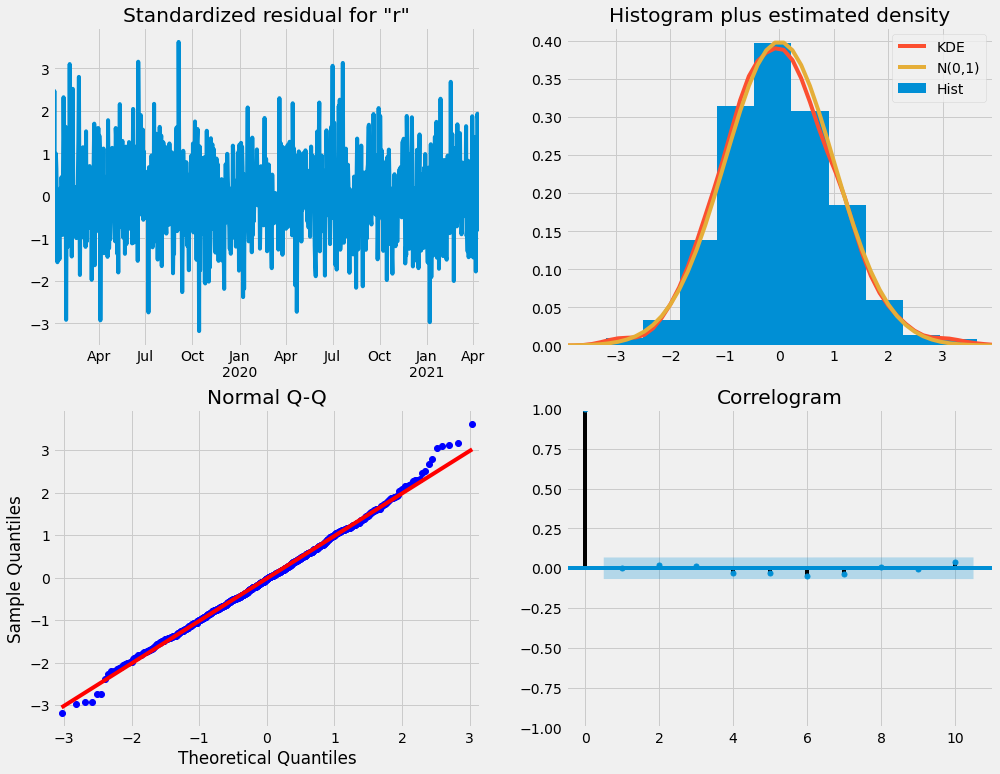

In [ ]:
modelo5_base3.plot_diagnostics(figsize=(15,12))
plt.show()

Al observar el gráfico de los residuales podemos observar que estos tienen media cero y varianza constante, respecto al histograma podemos observar que la densidad de estos datos dan la forma de una distribución normal.

### 8.
Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [ ]:
pred = modelo5_base3.get_forecast(5)
pred_ci = pred.conf_int()
pred_ci

,lower registro,upper registro
2021-04-17,-55.553508,-51.688198
2021-04-18,-58.505598,-50.072965
2021-04-19,-61.111373,-47.759914
2021-04-20,-64.213667,-44.378144
2021-04-21,-67.286650,-41.305161


In [ ]:
pred.predicted_mean

2021-04-17   -53.620853
2021-04-18   -54.289281
2021-04-19   -54.435644
2021-04-20   -54.295906
2021-04-21   -54.295906
Freq: D, Name: predicted_mean, dtype: float64

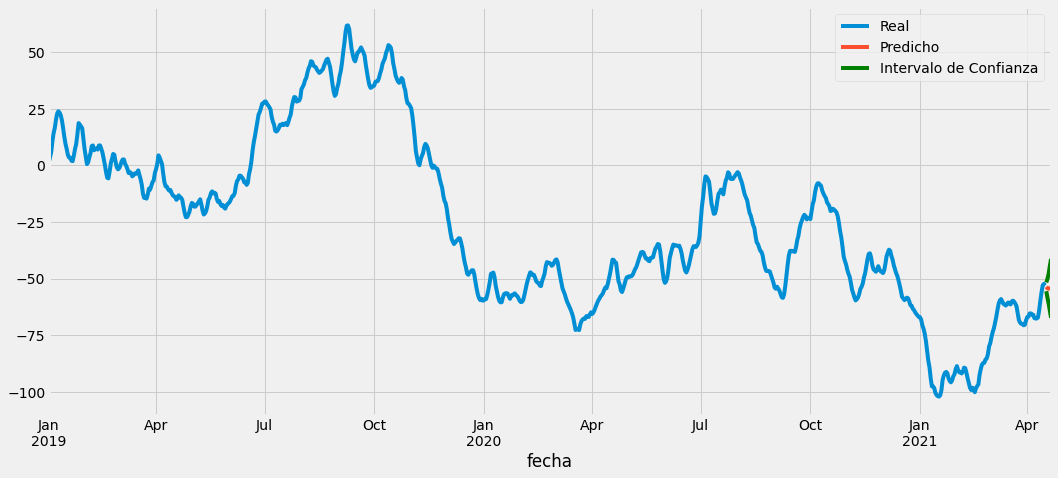

In [ ]:
plt.figure(figsize=(16,7))  #  Graficamos:
base3.registro.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

El pronóstico un paso al futuro, es decir para el 2021-04-17 es de -53.620853 y puede variar con una confianza del 95% entre (-55.553508, -51.688198), con un nivel de significancia del 0.05.

Cabe resaltar que a medida que se aleja cada pronósticos el intervalo de confianza va aumentar, perdiendo así precisión.

De igual forma se interpretaría para los cuatro prónosticos restantes.